A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
2. Build a regression model to predict the profit from the given data and comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [10]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the Dataset
data=pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\ICT\Datas\Casestudy/Add_sales_data_2018.csv')

In [4]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
data.shape

(205, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
data.describe

<bound method NDFrame.describe of            Date  Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
0    2018-10-08              208.00              222.25              206.85   
1    2018-10-05              217.00              218.60              205.90   
2    2018-10-04              223.50              227.80              216.15   
3    2018-10-03              230.00              237.50              225.75   
4    2018-10-01              234.55              234.60              221.05   
..          ...                 ...                 ...                 ...   
200  2017-12-14              288.00              288.25              279.20   
201  2017-12-13              290.00              292.50              282.20   
202  2017-12-12              298.60              298.60              286.65   
203  2017-12-11              290.00              299.55              285.90   
204  2017-12-08              287.55              289.90              285.05   

     Add4(in Thou

In [8]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [9]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

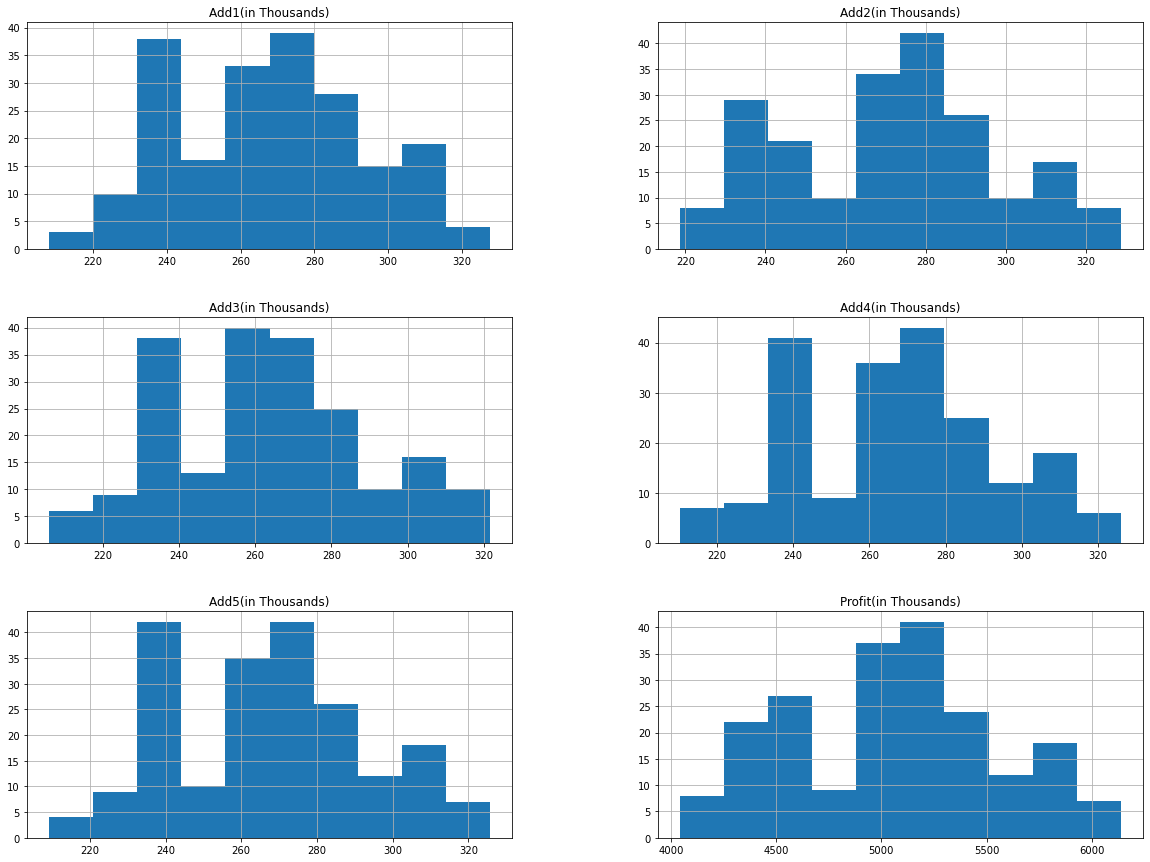

In [11]:
data.hist(figsize=(20,15))
plt.show()

All columns are normally distributed and contains continuous numeric variables.

# Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

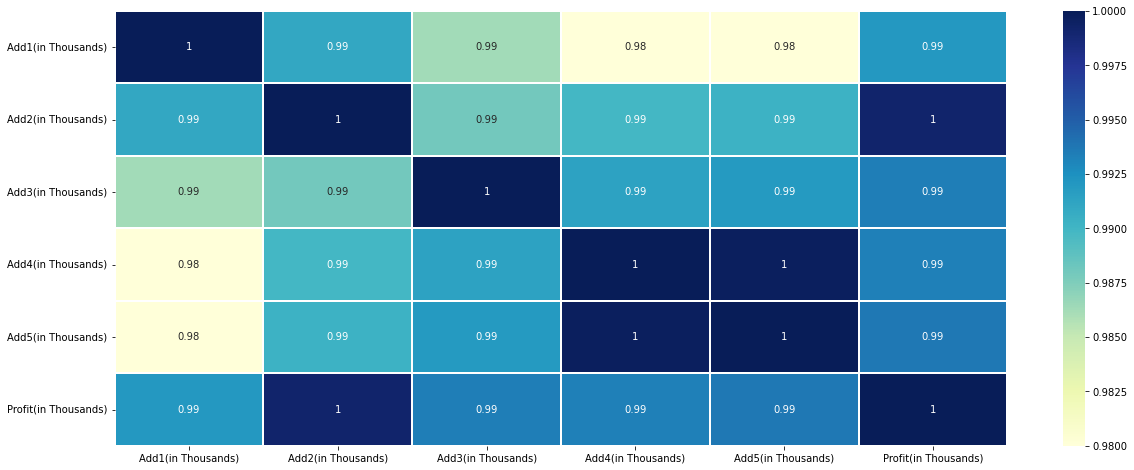

In [14]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.98,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')

From the above heatmap, we can conclude that the amount spent for advertising through five different companies and profit generated are strongly correlated.

# Build a regression model to predict the profit from the given data and comment your findings on it.

In [18]:
#Split dataset into dependent and independent variables.Dependent variables stored to y and independent variables stored to x.
y = data['Profit(in Thousands)']
x= data.drop(['Profit(in Thousands)','Date'],axis=1)

In [19]:
x.shape

(205, 5)

In [21]:
#Split dataset to train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [23]:
#Create linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)
print(predictions)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64
[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.5

In [24]:
#Calculate efficiency of the model
from sklearn.metrics import mean_squared_error
print('MSE is: ',mean_squared_error(y_test,predictions))

MSE is:  6.362927788869444e-25


Model accuracy will be very high due to very low MSE value.

# Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [25]:
#Assigning the values into a dictionary
profit={'Add1(in Thousands)':[290],
        'Add2(in Thousands)':[312],
        'Add3(in Thousands)':[309],
        'Add4(in Thousands)':[298],
        'Add5(in Thousands)':[320]}

In [26]:
#Creating a Dataframe
Profit=pd.DataFrame(profit)
Profit

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [27]:
model.predict(Profit)

array([5820.06])